---
# <div align="center"><font color='green'> COSC 2673/2793 | Machine Learning  </font></div>
## <div align="center"> <font color='green'> Assignment 1: **Edvin Berberovic s3722163**</font></div>
---

# Load dataset to Python Notebook

Handle necessary imports

In [96]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

Read in required data

In [97]:
hospitalFrame = pd.read_csv('./train_data.csv', delimiter=',')

Here we drop unecessary bits of data to clean the csv.

In [98]:
hospitalFrame = hospitalFrame.drop(['ID', 'HealthServiceArea'], axis=1)

Printing the data to check for any issues

In [99]:
print(hospitalFrame)

      Gender                    Race TypeOfAdmission  CCSProcedureCode  \
0          F              Other Race         Newborn               228   
1          M  Black/African American         Newborn               228   
2          M              Other Race         Newborn               220   
3          F              Other Race         Newborn                 0   
4          F              Other Race         Newborn               228   
...      ...                     ...             ...               ...   
59961      M  Black/African American         Newborn               115   
59962      M                   White         Newborn               115   
59963      M                   White         Newborn               115   
59964      M                   White         Newborn                -1   
59965      F                   White         Newborn               231   

       APRSeverityOfIllnessCode           PaymentTypology  BirthWeight  \
0                             1      

We can already identify several points in the data that may pose an issue due to being categorical e.g. Race, PaymentTypology and so on. First we will examine the data as-is before we handle any pre-processing.

In [100]:
hospitalFrame.head()

,Gender,Race,TypeOfAdmission,CCSProcedureCode,APRSeverityOfIllnessCode,PaymentTypology,BirthWeight,EmergencyDepartmentIndicator,AverageCostInCounty,AverageChargesInCounty,AverageCostInFacility,AverageChargesInFacility,AverageIncomeInZipCode,LengthOfStay
0,F,Other Race,Newborn,228,1,Medicaid,3700,N,2611,9227,1751,8951,45,1
1,M,Black/African American,Newborn,228,1,Medicaid,2900,N,3242,8966,3338,6409,34,1
2,M,Other Race,Newborn,220,1,Private Health Insurance,3200,N,3155,11381,4980,9323,45,1
3,F,Other Race,Newborn,0,1,Private Health Insurance,3300,N,3155,11381,5826,15680,59,1
4,F,Other Race,Newborn,228,1,Medicaid,2600,N,2611,9227,6000,14344,59,1


# Exploratory Data Analysis (EDA)

Often the first step in developing a machine learning solution for a given dataset is the EDA. EDA refers to the critical process of performing initial investigations on data so as to:
 - Maximize insight into a data set;
 - Uncover underlying structure;
 - Extract important variables;
 - Detect outliers and anomalies;
 - Test underlying assumptions;
 - Develop parsimonious models; and
 - Determine optimal factor settings.
 
with the help of summary statistics and graphical representations. The particular graphical techniques employed in EDA are often quite simple, consisting of various techniques of:

- Plotting the raw data (such as data traces, histograms, bi-histograms, probability plots, lag plots, block plots, and Youden plots.
- Plotting simple statistics such as mean plots, standard deviation plots, box plots, and main effects plots of the raw data.
- Positioning such plots so as to maximize our natural pattern-recognition abilities, such as using multiple plots per page.


In [101]:
hospitalFrame.shape

(59966, 14)

Here we can see that the data is currently organised into 14 columns of params and 59966 rows of data.

In [102]:
hospitalFrame.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 59966 entries, 0 to 59965
Data columns (total 14 columns):
 #   Column                        Non-Null Count  Dtype 
---  ------                        --------------  ----- 
 0   Gender                        59966 non-null  object
 1   Race                          59966 non-null  object
 2   TypeOfAdmission               59966 non-null  object
 3   CCSProcedureCode              59966 non-null  int64 
 4   APRSeverityOfIllnessCode      59966 non-null  int64 
 5   PaymentTypology               59966 non-null  object
 6   BirthWeight                   59966 non-null  int64 
 7   EmergencyDepartmentIndicator  59966 non-null  object
 8   AverageCostInCounty           59966 non-null  int64 
 9   AverageChargesInCounty        59966 non-null  int64 
 10  AverageCostInFacility         59966 non-null  int64 
 11  AverageChargesInFacility      59966 non-null  int64 
 12  AverageIncomeInZipCode        59966 non-null  int64 
 13  LengthOfStay    

There are no issues with the data info, all types are non-null and there are 14 columns which matches the dataframe's shape.

In [103]:
hospitalFrame.describe()

,CCSProcedureCode,APRSeverityOfIllnessCode,BirthWeight,AverageCostInCounty,AverageChargesInCounty,AverageCostInFacility,AverageChargesInFacility,AverageIncomeInZipCode,LengthOfStay
count,59966.000000,59966.000000,59966.000000,59966.000000,59966.000000,59966.000000,59966.000000,59966.000000,59966.000000
mean,155.404229,1.254594,3336.298903,2372.806690,7979.126922,2396.414318,7958.472668,59.811143,2.538405
std,89.541978,0.546207,446.244475,639.755096,3220.291347,1248.501189,3859.294711,21.470170,1.171246
min,-1.000000,1.000000,2500.000000,712.000000,1243.000000,457.000000,1120.000000,28.000000,1.000000
25%,115.000000,1.000000,3000.000000,2041.000000,4620.000000,1551.000000,4438.000000,45.000000,2.000000
50%,220.000000,1.000000,3300.000000,2533.000000,9227.000000,1967.000000,7945.000000,55.000000,2.000000
75%,228.000000,1.000000,3600.000000,2785.000000,10644.000000,2895.000000,11619.000000,74.000000,3.000000
max,231.000000,4.000000,7500.000000,3242.000000,11381.000000,8114.000000,18466.000000,115.000000,10.000000


We can see that running a .descibe() call results in missing columns of data. This is because of categorical data within the frame. We will clean this up after initial checks

1. Categorical Variables: These are data points that take on a finite number of values, AND whose values do not have a numerical interpretation.

    * Ordinal categorical variables take on values which can be logically ordered. For example, the reviews for a product which are given as 0-5 stars. 

    * Nominal categorical variables cannot be put in any logical order. Examples of this would be the gender, race, etc.
 
2. Numerical Variables: These are variables which are numerical in nature

    * Continuous Variables: Take on a continuous values (no breaks). For example, height, weight.

    * Discrete numerical variables take on a set of values which can be counted. For example, the number of rooms in a house.

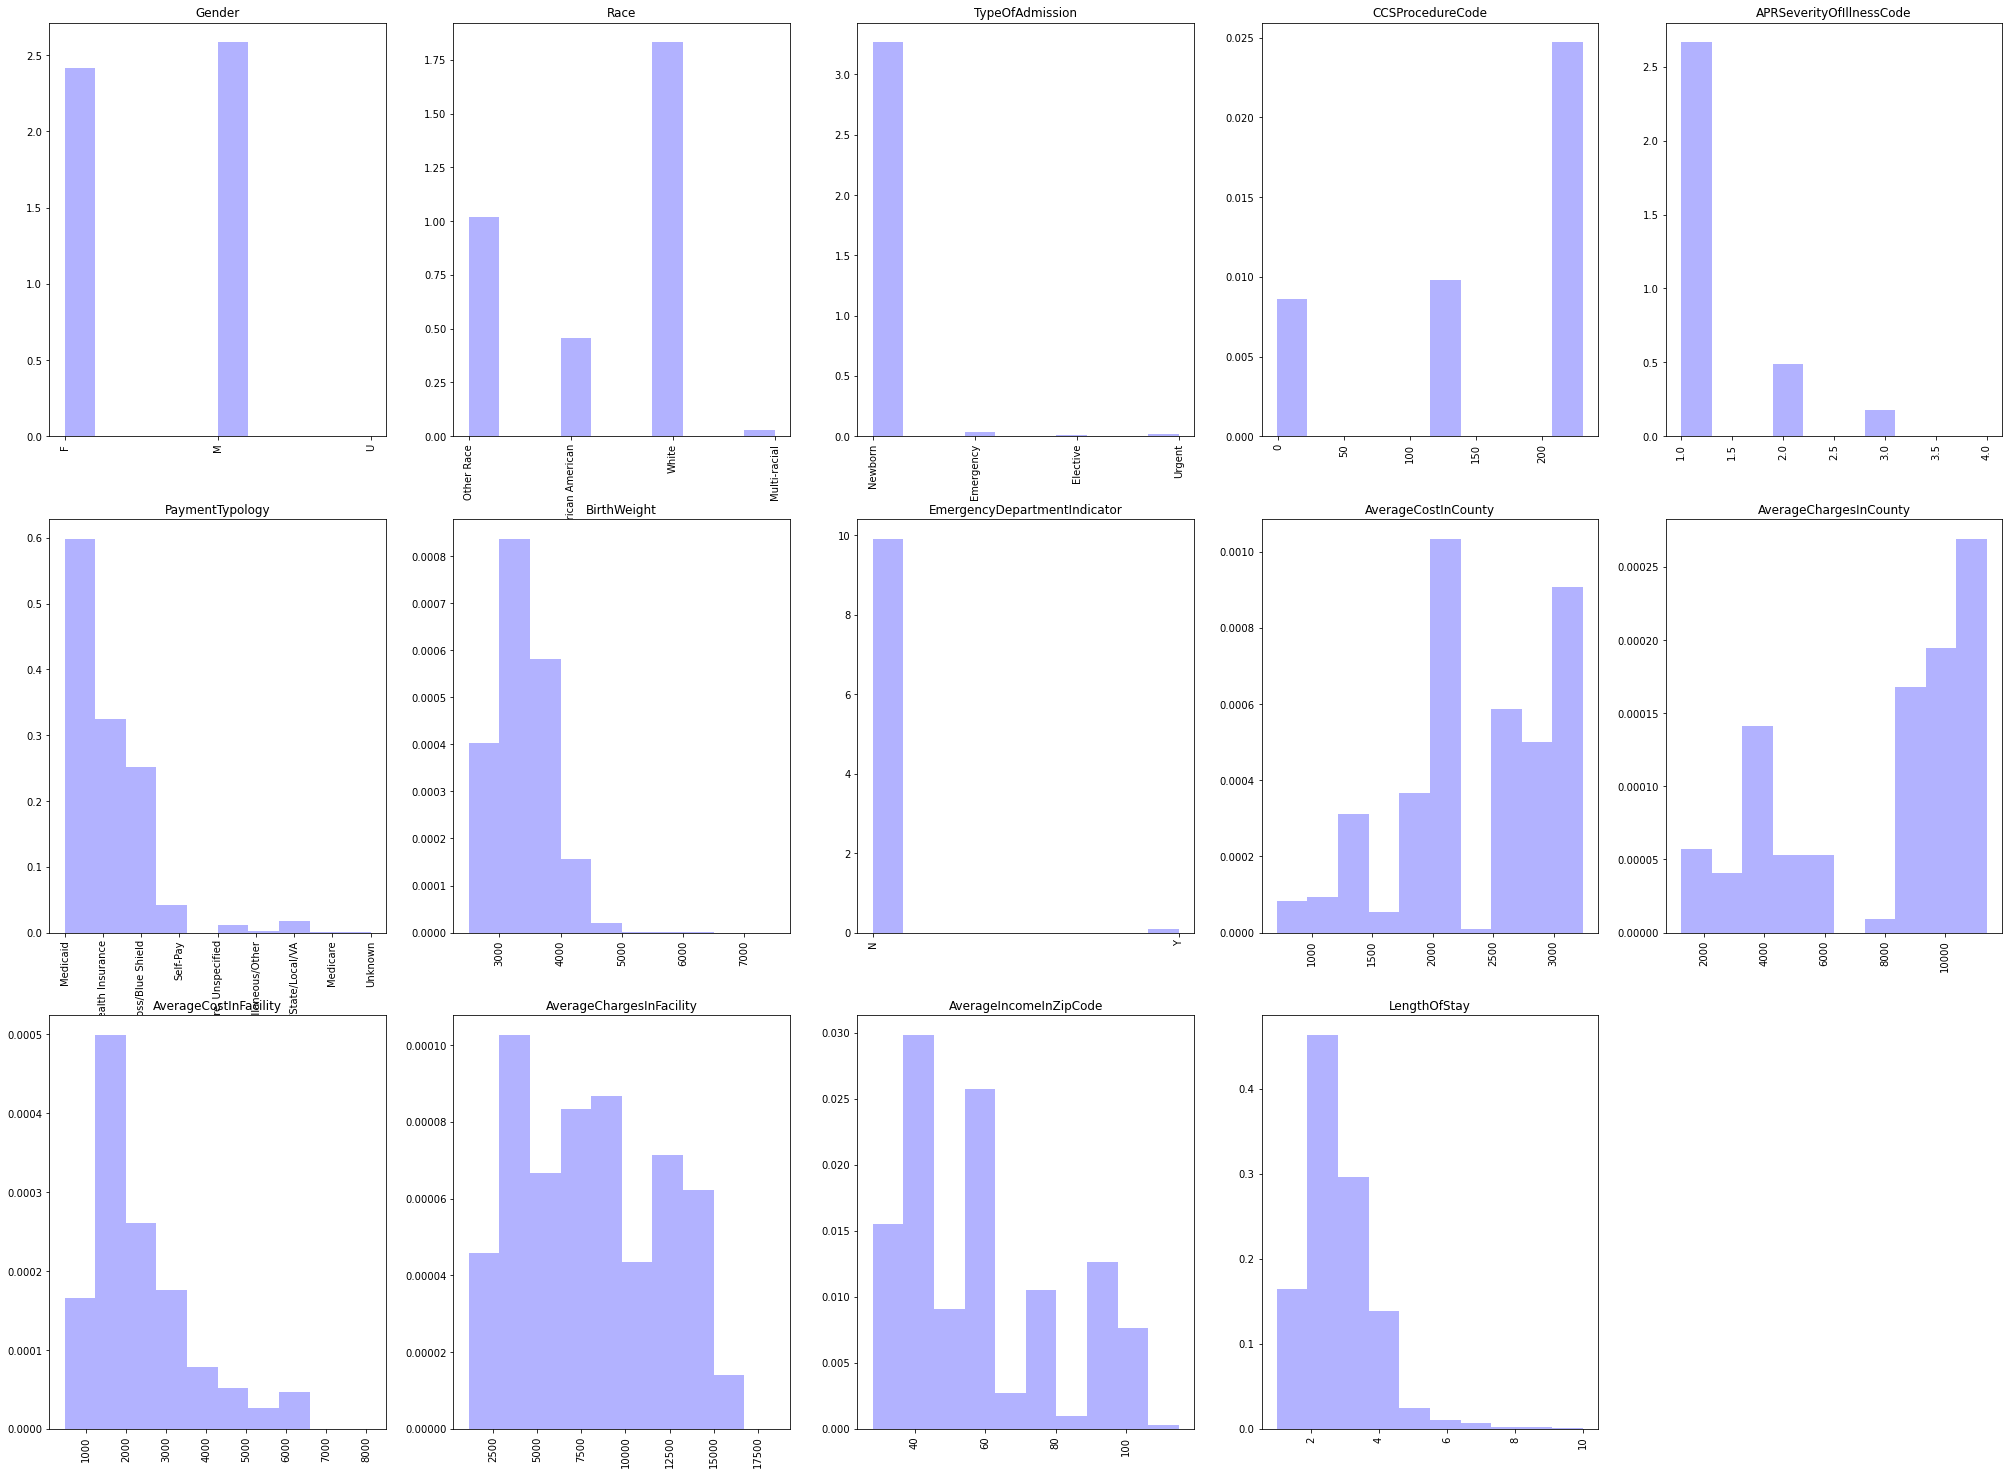

In [104]:
plt.figure(figsize=(35,35))
for i, col in enumerate(hospitalFrame.columns):
    plt.subplot(4,5,i+1)
    plt.hist(hospitalFrame[col], alpha=0.3, color='b', density=True)
    plt.title(col)
    plt.xticks(rotation='vertical')

> <span style="font-size:1em;">✔</span> **Observations:** 
> - Attribute Gender is a categorical variable, split into Male, Female and U which must be further investigated 
> - Attribute Race is a categorical variable
> - Attribute TypeOfAdmission is a categorical variable
> - Attribute PaymentTypology is a categorical variable

## Relationship between variables

In the previous section we observed each attribute (data column) independently. Sometimes it is also useful to observe the relationship between two variables. There are several techniques that we can use for this purpose. One of the key techniques is a scatter plot. 

Since our task is to predict LengthOfStay (target variable) using all other attributes, let's plot the relationship between LengthOfStay and other columns.

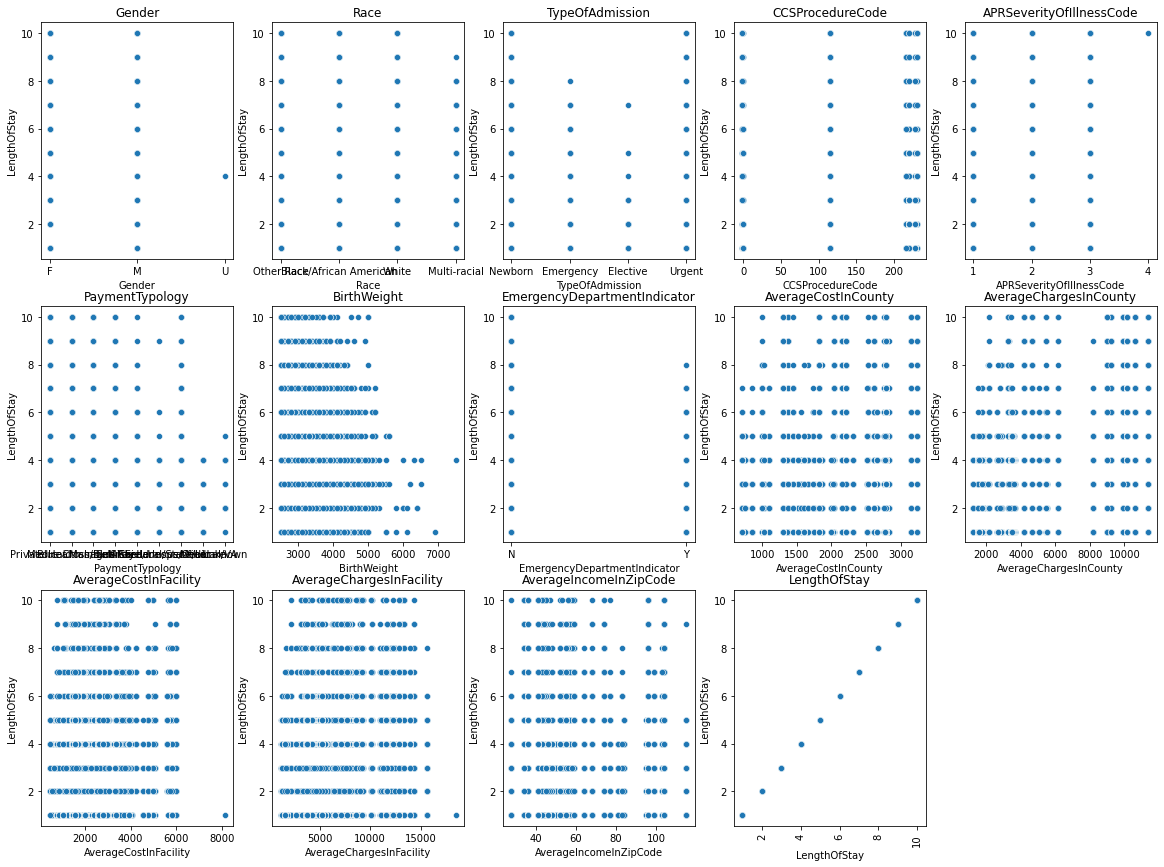

In [105]:
import seaborn as sns
plt.figure(figsize=(20,20))
for i, col in enumerate(hospitalFrame.columns):
    plt.subplot(4,5,i+1)
    sns.scatterplot(data=hospitalFrame, x=col, y='LengthOfStay')
    # sns.regplot(x=col,y='LengthOfStay', data=hospitalFrame)
    plt.title(col)


plt.xticks(rotation='vertical')
plt.show()

Looking at the relationship between each point of data and LengthOfStay we can see that there are many points of categorical data impacting our analysis, adjustments will have to be made to progress.

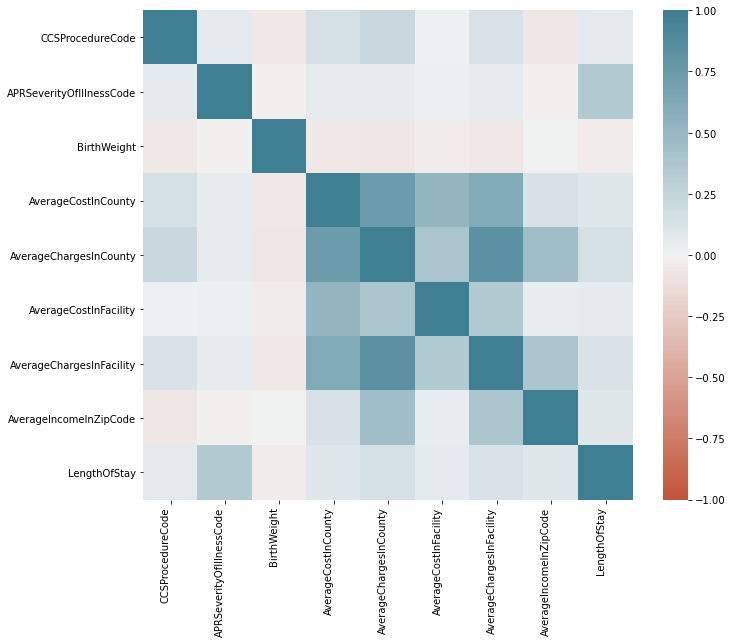

In [95]:
import seaborn as sns

f, ax = plt.subplots(figsize=(11, 9))
corr = hospitalFrame.corr()
ax = sns.heatmap(
    corr, 
    vmin=-1, vmax=1, center=0,
    cmap=sns.diverging_palette(20, 220, n=200),
    square=True
)
ax.set_xticklabels(
    ax.get_xticklabels(),
    rotation=90,
    horizontalalignment='right'
);

# Data Pre-processing (or Transforming)

The data read frm the train_data set has many categorical points of data which affect our ability to analyse the data and provide it to a learning model. We will clean the data up.

1. Cleaning data & Removing/filling missing values.
2. Encoding data
3. Feature scaling


## Encoding Categorical data

Categorical Variables: These are data points that take on a finite number of values, AND whose values do not have a numerical interpretation.

- Ordinal categorical variables take on values which can be logically ordered. For example, the reviews for a product which are given as 0-5 stars. 

- Nominal categorical variables cannot be put in any logical order. Examples of this would be the gender, race, etc.


In [106]:
hospitalFrame.head()

,Gender,Race,TypeOfAdmission,CCSProcedureCode,APRSeverityOfIllnessCode,PaymentTypology,BirthWeight,EmergencyDepartmentIndicator,AverageCostInCounty,AverageChargesInCounty,AverageCostInFacility,AverageChargesInFacility,AverageIncomeInZipCode,LengthOfStay
0,F,Other Race,Newborn,228,1,Medicaid,3700,N,2611,9227,1751,8951,45,1
1,M,Black/African American,Newborn,228,1,Medicaid,2900,N,3242,8966,3338,6409,34,1
2,M,Other Race,Newborn,220,1,Private Health Insurance,3200,N,3155,11381,4980,9323,45,1
3,F,Other Race,Newborn,0,1,Private Health Insurance,3300,N,3155,11381,5826,15680,59,1
4,F,Other Race,Newborn,228,1,Medicaid,2600,N,2611,9227,6000,14344,59,1


Examining Columns further for categorical data.

In [114]:
print(set((data['Gender'])))

{'U', 'F', 'M'}


This is a variable that cannot be put in any logical order, even represented as number it cannot be compared against itself for weighting. We will split Gender into seperate enumerated categories.

A common approach is called one hot encoding. The basic strategy is to convert each category value into a new column and assign a 1 or 0 (True/False) value to the column. This has the benefit of not weighting a value improperly but does have the downside of adding more columns to the data set. We will hot encode the genders into their true or false values.

In [119]:
from sklearn.preprocessing import OneHotEncoder

OneHotEncoder_Gender = OneHotEncoder(handle_unknown='ignore')
OneHotEncoder_Gender.fit(hospitalFrame[['Gender']])

onehot_ = OneHotEncoder_Gender.transform(hospitalFrame[['Gender']]).toarray()

print(onehot_.shape, OneHotEncoder_Gender.categories_)

(59966, 3) [array(['F', 'M', 'U'], dtype=object)]


We can see that the `Gender` column is now converted to 3 columns. The first column will say if the Gender is Male or not, then the next Female or not and so on. 

Now we can put these columns back to the dataframe.

In [120]:
colName = 'Gender'
for i in range(len(OneHotEncoder_Gender.categories_[0])):
    hospitalFrame[colName + '_' + str(OneHotEncoder_Gender.categories_[0][i])] = onehot_[:,i]

    
hospitalFrame.head()

,Gender,Race,TypeOfAdmission,CCSProcedureCode,APRSeverityOfIllnessCode,PaymentTypology,BirthWeight,EmergencyDepartmentIndicator,AverageCostInCounty,AverageChargesInCounty,AverageCostInFacility,AverageChargesInFacility,AverageIncomeInZipCode,LengthOfStay,Gender_F,Gender_M,Gender_U
0,F,Other Race,Newborn,228,1,Medicaid,3700,N,2611,9227,1751,8951,45,1,1.0,0.0,0.0
1,M,Black/African American,Newborn,228,1,Medicaid,2900,N,3242,8966,3338,6409,34,1,0.0,1.0,0.0
2,M,Other Race,Newborn,220,1,Private Health Insurance,3200,N,3155,11381,4980,9323,45,1,0.0,1.0,0.0
3,F,Other Race,Newborn,0,1,Private Health Insurance,3300,N,3155,11381,5826,15680,59,1,1.0,0.0,0.0
4,F,Other Race,Newborn,228,1,Medicaid,2600,N,2611,9227,6000,14344,59,1,1.0,0.0,0.0


Now we have three extra columns. compare them with the original 'Gender' column and see if it matches.

Since we have represented the 'Gender' column with the three new columns, we should remove the original column to eliminate redundancy.

In [121]:
hospitalFrame = hospitalFrame.drop(['Gender'], axis=1)
hospitalFrame.head()

,Race,TypeOfAdmission,CCSProcedureCode,APRSeverityOfIllnessCode,PaymentTypology,BirthWeight,EmergencyDepartmentIndicator,AverageCostInCounty,AverageChargesInCounty,AverageCostInFacility,AverageChargesInFacility,AverageIncomeInZipCode,LengthOfStay,Gender_F,Gender_M,Gender_U
0,Other Race,Newborn,228,1,Medicaid,3700,N,2611,9227,1751,8951,45,1,1.0,0.0,0.0
1,Black/African American,Newborn,228,1,Medicaid,2900,N,3242,8966,3338,6409,34,1,0.0,1.0,0.0
2,Other Race,Newborn,220,1,Private Health Insurance,3200,N,3155,11381,4980,9323,45,1,0.0,1.0,0.0
3,Other Race,Newborn,0,1,Private Health Insurance,3300,N,3155,11381,5826,15680,59,1,1.0,0.0,0.0
4,Other Race,Newborn,228,1,Medicaid,2600,N,2611,9227,6000,14344,59,1,1.0,0.0,0.0


In [115]:
print(set((data['Race'])))

{'Other Race', 'White', 'Multi-racial', 'Black/African American'}


This is a variable that cannot be put in any logical order, even converted into a number we cannot compare them against each other. As such, we will split race into separate columns like the above Gender.

In [122]:
OneHotEncoder_Race = OneHotEncoder(handle_unknown='ignore')
OneHotEncoder_Race.fit(hospitalFrame[['Race']])

onehot_ = OneHotEncoder_Race.transform(hospitalFrame[['Race']]).toarray()

print(onehot_.shape, OneHotEncoder_Race.categories_)

(59966, 4) [array(['Black/African American', 'Multi-racial', 'Other Race', 'White'],
      dtype=object)]


We can see that the `Race` column is now converted to 4 columns.

Now we can put these columns back to the dataframe.

In [123]:
colName = 'Race'
for i in range(len(OneHotEncoder_Race.categories_[0])):
    hospitalFrame[colName + '_' + str(OneHotEncoder_Race.categories_[0][i])] = onehot_[:,i]

    
hospitalFrame.head()

,Race,TypeOfAdmission,CCSProcedureCode,APRSeverityOfIllnessCode,PaymentTypology,BirthWeight,EmergencyDepartmentIndicator,AverageCostInCounty,AverageChargesInCounty,AverageCostInFacility,AverageChargesInFacility,AverageIncomeInZipCode,LengthOfStay,Gender_F,Gender_M,Gender_U,Race_Black/African American,Race_Multi-racial,Race_Other Race,Race_White
0,Other Race,Newborn,228,1,Medicaid,3700,N,2611,9227,1751,8951,45,1,1.0,0.0,0.0,0.0,0.0,1.0,0.0
1,Black/African American,Newborn,228,1,Medicaid,2900,N,3242,8966,3338,6409,34,1,0.0,1.0,0.0,1.0,0.0,0.0,0.0
2,Other Race,Newborn,220,1,Private Health Insurance,3200,N,3155,11381,4980,9323,45,1,0.0,1.0,0.0,0.0,0.0,1.0,0.0
3,Other Race,Newborn,0,1,Private Health Insurance,3300,N,3155,11381,5826,15680,59,1,1.0,0.0,0.0,0.0,0.0,1.0,0.0
4,Other Race,Newborn,228,1,Medicaid,2600,N,2611,9227,6000,14344,59,1,1.0,0.0,0.0,0.0,0.0,1.0,0.0


In [124]:
hospitalFrame = hospitalFrame.drop(['Race'], axis=1)
hospitalFrame.head()

,TypeOfAdmission,CCSProcedureCode,APRSeverityOfIllnessCode,PaymentTypology,BirthWeight,EmergencyDepartmentIndicator,AverageCostInCounty,AverageChargesInCounty,AverageCostInFacility,AverageChargesInFacility,AverageIncomeInZipCode,LengthOfStay,Gender_F,Gender_M,Gender_U,Race_Black/African American,Race_Multi-racial,Race_Other Race,Race_White
0,Newborn,228,1,Medicaid,3700,N,2611,9227,1751,8951,45,1,1.0,0.0,0.0,0.0,0.0,1.0,0.0
1,Newborn,228,1,Medicaid,2900,N,3242,8966,3338,6409,34,1,0.0,1.0,0.0,1.0,0.0,0.0,0.0
2,Newborn,220,1,Private Health Insurance,3200,N,3155,11381,4980,9323,45,1,0.0,1.0,0.0,0.0,0.0,1.0,0.0
3,Newborn,0,1,Private Health Insurance,3300,N,3155,11381,5826,15680,59,1,1.0,0.0,0.0,0.0,0.0,1.0,0.0
4,Newborn,228,1,Medicaid,2600,N,2611,9227,6000,14344,59,1,1.0,0.0,0.0,0.0,0.0,1.0,0.0


In [116]:
print(set((data['TypeOfAdmission'])))

{'Urgent', 'Newborn', 'Elective', 'Emergency'}


This is a variable that cannot be put in any logical order, even converted into a number we cannot compare them against each other. As such, we will split race into separate columns like the above Gender.

In [125]:
OneHotEncoder_TypeOfAdmission = OneHotEncoder(handle_unknown='ignore')
OneHotEncoder_TypeOfAdmission.fit(hospitalFrame[['TypeOfAdmission']])

onehot_ = OneHotEncoder_TypeOfAdmission.transform(hospitalFrame[['TypeOfAdmission']]).toarray()

print(onehot_.shape, OneHotEncoder_TypeOfAdmission.categories_)

(59966, 4) [array(['Elective', 'Emergency', 'Newborn', 'Urgent'], dtype=object)]


We can see that the `TypeOfAdmission` column is now converted to 4 columns.

Now we can put these columns back to the dataframe.

In [126]:
colName = 'TypeOfAdmission'
for i in range(len(OneHotEncoder_TypeOfAdmission.categories_[0])):
    hospitalFrame[colName + '_' + str(OneHotEncoder_TypeOfAdmission.categories_[0][i])] = onehot_[:,i]

    
hospitalFrame.head()

,TypeOfAdmission,CCSProcedureCode,APRSeverityOfIllnessCode,PaymentTypology,BirthWeight,EmergencyDepartmentIndicator,AverageCostInCounty,AverageChargesInCounty,AverageCostInFacility,AverageChargesInFacility,...,Gender_M,Gender_U,Race_Black/African American,Race_Multi-racial,Race_Other Race,Race_White,TypeOfAdmission_Elective,TypeOfAdmission_Emergency,TypeOfAdmission_Newborn,TypeOfAdmission_Urgent
0,Newborn,228,1,Medicaid,3700,N,2611,9227,1751,8951,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
1,Newborn,228,1,Medicaid,2900,N,3242,8966,3338,6409,...,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
2,Newborn,220,1,Private Health Insurance,3200,N,3155,11381,4980,9323,...,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
3,Newborn,0,1,Private Health Insurance,3300,N,3155,11381,5826,15680,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
4,Newborn,228,1,Medicaid,2600,N,2611,9227,6000,14344,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0


In [127]:
hospitalFrame = hospitalFrame.drop(['TypeOfAdmission'], axis=1)
hospitalFrame.head()

,CCSProcedureCode,APRSeverityOfIllnessCode,PaymentTypology,BirthWeight,EmergencyDepartmentIndicator,AverageCostInCounty,AverageChargesInCounty,AverageCostInFacility,AverageChargesInFacility,AverageIncomeInZipCode,...,Gender_M,Gender_U,Race_Black/African American,Race_Multi-racial,Race_Other Race,Race_White,TypeOfAdmission_Elective,TypeOfAdmission_Emergency,TypeOfAdmission_Newborn,TypeOfAdmission_Urgent
0,228,1,Medicaid,3700,N,2611,9227,1751,8951,45,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
1,228,1,Medicaid,2900,N,3242,8966,3338,6409,34,...,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
2,220,1,Private Health Insurance,3200,N,3155,11381,4980,9323,45,...,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
3,0,1,Private Health Insurance,3300,N,3155,11381,5826,15680,59,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
4,228,1,Medicaid,2600,N,2611,9227,6000,14344,59,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0


In [124]:
hospitalFrame = hospitalFrame.drop(['Race'], axis=1)
hospitalFrame.head()

,TypeOfAdmission,CCSProcedureCode,APRSeverityOfIllnessCode,PaymentTypology,BirthWeight,EmergencyDepartmentIndicator,AverageCostInCounty,AverageChargesInCounty,AverageCostInFacility,AverageChargesInFacility,AverageIncomeInZipCode,LengthOfStay,Gender_F,Gender_M,Gender_U,Race_Black/African American,Race_Multi-racial,Race_Other Race,Race_White
0,Newborn,228,1,Medicaid,3700,N,2611,9227,1751,8951,45,1,1.0,0.0,0.0,0.0,0.0,1.0,0.0
1,Newborn,228,1,Medicaid,2900,N,3242,8966,3338,6409,34,1,0.0,1.0,0.0,1.0,0.0,0.0,0.0
2,Newborn,220,1,Private Health Insurance,3200,N,3155,11381,4980,9323,45,1,0.0,1.0,0.0,0.0,0.0,1.0,0.0
3,Newborn,0,1,Private Health Insurance,3300,N,3155,11381,5826,15680,59,1,1.0,0.0,0.0,0.0,0.0,1.0,0.0
4,Newborn,228,1,Medicaid,2600,N,2611,9227,6000,14344,59,1,1.0,0.0,0.0,0.0,0.0,1.0,0.0


In [129]:
print(set((data['PaymentTypology'])))

{'Blue Cross/Blue Shield', 'Federal/State/Local/VA', 'Medicare', 'Self-Pay', 'Medicaid', 'Managed Care, Unspecified', 'Private Health Insurance', 'Unknown', 'Miscellaneous/Other'}


This is a variable that cannot be put in any logical order, even converted into a number we cannot compare them against each other. As such, we will split race into separate columns like the above Gender.

In [130]:
OneHotEncoder_PaymentTypology = OneHotEncoder(handle_unknown='ignore')
OneHotEncoder_PaymentTypology.fit(hospitalFrame[['PaymentTypology']])

onehot_ = OneHotEncoder_PaymentTypology.transform(hospitalFrame[['PaymentTypology']]).toarray()

print(onehot_.shape, OneHotEncoder_PaymentTypology.categories_)

(59966, 9) [array(['Blue Cross/Blue Shield', 'Federal/State/Local/VA',
       'Managed Care, Unspecified', 'Medicaid', 'Medicare',
       'Miscellaneous/Other', 'Private Health Insurance', 'Self-Pay',
       'Unknown'], dtype=object)]


We can see that the `PaymentTypology` column is now converted to 9 columns.

Now we can put these columns back to the dataframe.

In [131]:
colName = 'PaymentTypology'
for i in range(len(OneHotEncoder_PaymentTypology.categories_[0])):
    hospitalFrame[colName + '_' + str(OneHotEncoder_PaymentTypology.categories_[0][i])] = onehot_[:,i]

    
hospitalFrame.head()

,CCSProcedureCode,APRSeverityOfIllnessCode,PaymentTypology,BirthWeight,EmergencyDepartmentIndicator,AverageCostInCounty,AverageChargesInCounty,AverageCostInFacility,AverageChargesInFacility,AverageIncomeInZipCode,...,TypeOfAdmission_Urgent,PaymentTypology_Blue Cross/Blue Shield,PaymentTypology_Federal/State/Local/VA,"PaymentTypology_Managed Care, Unspecified",PaymentTypology_Medicaid,PaymentTypology_Medicare,PaymentTypology_Miscellaneous/Other,PaymentTypology_Private Health Insurance,PaymentTypology_Self-Pay,PaymentTypology_Unknown
0,228,1,Medicaid,3700,N,2611,9227,1751,8951,45,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
1,228,1,Medicaid,2900,N,3242,8966,3338,6409,34,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
2,220,1,Private Health Insurance,3200,N,3155,11381,4980,9323,45,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
3,0,1,Private Health Insurance,3300,N,3155,11381,5826,15680,59,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
4,228,1,Medicaid,2600,N,2611,9227,6000,14344,59,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0


In [132]:
hospitalFrame = hospitalFrame.drop(['PaymentTypology'], axis=1)
hospitalFrame.head()

,CCSProcedureCode,APRSeverityOfIllnessCode,BirthWeight,EmergencyDepartmentIndicator,AverageCostInCounty,AverageChargesInCounty,AverageCostInFacility,AverageChargesInFacility,AverageIncomeInZipCode,LengthOfStay,...,TypeOfAdmission_Urgent,PaymentTypology_Blue Cross/Blue Shield,PaymentTypology_Federal/State/Local/VA,"PaymentTypology_Managed Care, Unspecified",PaymentTypology_Medicaid,PaymentTypology_Medicare,PaymentTypology_Miscellaneous/Other,PaymentTypology_Private Health Insurance,PaymentTypology_Self-Pay,PaymentTypology_Unknown
0,228,1,3700,N,2611,9227,1751,8951,45,1,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
1,228,1,2900,N,3242,8966,3338,6409,34,1,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
2,220,1,3200,N,3155,11381,4980,9323,45,1,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
3,0,1,3300,N,3155,11381,5826,15680,59,1,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
4,228,1,2600,N,2611,9227,6000,14344,59,1,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0


In [133]:
print(set((data['EmergencyDepartmentIndicator'])))

{'Y', 'N'}


This is a variable that can be put into a logical numeric. We can assign Y to 1 and N to 0.